## Ejercicio 4

### Qiskit - Teleportación

Primero definimos el circuito del ejercicio 1, pero esta vez con qiskit.

In [20]:
from qiskit import QuantumCircuit

qiskit_tp = QuantumCircuit(3, 3)

qiskit_tp.h(1)
qiskit_tp.cx(1, 2)
qiskit_tp.cx(0, 1)
qiskit_tp.h(0)
qiskit_tp.cx(1, 2)
qiskit_tp.cz(0, 2)
qiskit_tp.measure(2, 0)

qiskit_tp.draw()

┌───┐      
q_0: ────────────■──┤ H ├─■────
     ┌───┐     ┌─┴─┐└───┘ │    
q_1: ┤ H ├──■──┤ X ├──■───┼────
     └───┘┌─┴─┐└───┘┌─┴─┐ │ ┌─┐
q_2: ─────┤ X ├─────┤ X ├─■─┤M├
          └───┘     └───┘   └╥┘
c: 3/════════════════════════╩═
                             0

Probamos en el circuito en un simulador antes de subirlo a un bakcend real.

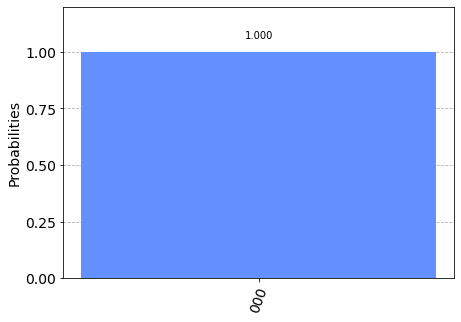

In [56]:
from qiskit import Aer
from qiskit.visualization import plot_histogram

sim = Aer.get_backend("qasm_simulator")
counts = sim.run(qiskit_tp, shots=1000).result().get_counts()
plot_histogram(counts)


El resultado es el esperado.

Ahora vamos a ejecutar el codigo en un backend real de IBM.

In [32]:
from qiskit import IBMQ

# Cargamos la cuenta de IBMQ.
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2022-03-03 12:36:58,366: Credentials are already in use. The existing account in the session will be replaced.


Esta vez se va a escoger el backend menos ocupado.

In [67]:
from qiskit.providers.ibmq import least_busy

backend = least_busy(provider.backends(filters=lambda x:  x.configuration().n_qubits == 5))
print(backend)

ibmq_belem


Transpilamos y encolamos el circuito en el backend. (*ibmq_belem*)

In [35]:
from qiskit import transpile

circuit = transpile(qiskit_tp, backend)

job = backend.run(circuit)
print("Job ID:", job.job_id())

Job ID: 6220a97ee51382767185c73f


### Qiskit - Codificación superdensa.

Definimos el circuito para la codificación superdensa usando Qiskit. (Vamos a enviar el estado *10*)

In [60]:
from qiskit import QuantumCircuit

qiskit_sd = QuantumCircuit(2, 2)
qiskit_sd.h(1)
qiskit_sd.cx(1, 0)
qiskit_sd.z(1)
qiskit_sd.cx(1, 0)
qiskit_sd.h(1)

qiskit_sd.measure([0, 1], [0, 1])

qiskit_sd.draw()

┌───┐     ┌───┐     ┌─┐   
q_0: ─────┤ X ├─────┤ X ├─────┤M├───
     ┌───┐└─┬─┘┌───┐└─┬─┘┌───┐└╥┘┌─┐
q_1: ┤ H ├──■──┤ Z ├──■──┤ H ├─╫─┤M├
     └───┘     └───┘     └───┘ ║ └╥┘
c: 2/══════════════════════════╩══╩═
                               0  1

Probamos el código en un simulador.

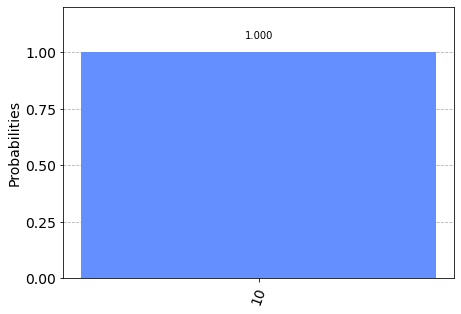

In [61]:
from qiskit import Aer
from qiskit.visualization import plot_histogram

sim = Aer.get_backend("qasm_simulator")

counts = sim.run(qiskit_sd, shots=1000).result().get_counts()
plot_histogram(counts)


El circuito está definido correctamente.

Vamos a transpilarlo y subirlo al backend real (*ibmq_belem*).

In [62]:
from qiskit import transpile

circuit = transpile(qiskit_sd, backend)

job = backend.run(circuit)
print("Job ID:", job.job_id())

Job ID: 6220acf3f5225d91ca64def0


### Ionq - Teleportación

Definimos el mismo circuito que en el ejercicio 2.

In [4]:
from braket.circuits import Circuit
    
ionQ_tp = Circuit().h(1).cnot(1, 2).cnot(0, 1).h(0).cnot(1, 2).rz(0, 2)
print(ionQ_tp)

T  : |0|1|2|3|  4  |
                    
q0 : -----C-H-Rz(2)-
          |         
q1 : -H-C-X-C-------
        |   |       
q2 : ---X---X-------

T  : |0|1|2|3|  4  |


Lanzamos la tarea al computador de IonQ

In [5]:
# Cremos la tarea y la dejamos en la cola de ejecución del computador de ionq
import boto3
from braket.circuits import Circuit
from braket.aws import AwsDevice

device = AwsDevice("arn:aws:braket:::device/qpu/ionq/ionQdevice")
s3_folder = ("amazon-braket-f085dc433a90", "apcc2022/JulianCamara/IONQ")

task = device.run(ionQ_tp, s3_folder)
print("Task:",task.id)
print("Status:", task.state())

Task: arn:aws:braket:us-east-1:975085098040:quantum-task/d6a1b1ef-ee88-4c9f-9fc8-ef0600a37855
Status: CREATED


Esperamos a los resultados y los ploteamos.

In [6]:
# Se recogen los resultados

from braket.aws import AwsQuantumTask
from matplotlib import pyplot as plt

# restore task with unique arn
task = AwsQuantumTask(arn="arn:aws:braket:us-east-1:975085098040:quantum-task/d6a1b1ef-ee88-4c9f-9fc8-ef0600a37855")
# retrieve the result of the task
estado = task.state()

if task.state() == "QUEUED":
    print("En cola")
else:
    results = task.result().measurement_counts
    print(results)
    plt.bar(results.keys(), [x / 1000 for x in results.values()])

En cola


### Ionq - Codificación superdensa.

In [ ]:
from braket.circuits import Circuit

IonQ_sd = Circuit().h(1).cx(1, 0).z(1).cx(1, 0).h(1)
print(IonQ_sd)